# Projeto Vinhos
## Importação de dados e união das bases

In [189]:
import pandas as pd

redWines = pd.read_csv('Data/Raw/wine/winequality-red.csv', sep=';')
whiteWines = pd.read_csv('Data/Raw/wine/winequality-white.csv', sep=';')

redWines['Tipo Vinho'] = 'Red'
whiteWines['Tipo Vinho'] = 'White'

dados = pd.concat([redWines, whiteWines])

print('Red    com {} linhas'.format(redWines.shape[0]))
print('White  com {} linhas'.format(whiteWines.shape[0]))
print('Juntos com {} linhas'.format(dados.shape[0]))

dados.to_csv('Data/Processed/retail/bigTableWines.csv')

dados.head(5)

Red    com 1599 linhas
White  com 4898 linhas
Juntos com 6497 linhas


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo Vinho
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


## Verificação de dados faltantes

In [190]:
dadosFaltantes = dados.isnull()
print(dadosFaltantes.shape[0])
dadosFaltantes.head(10)

6497


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Tipo Vinho
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False


In [152]:
dados.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.06,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


In [191]:
(((dados.count(axis=0)/dados.shape[0])*100)-100).round(1)

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
Tipo Vinho              0.0
dtype: float64

# Faixa Dinâmica de Cada Variável

In [192]:
dadosNumericos = dados.copy()
dadosNumericos.drop(['Tipo Vinho'], axis=1, inplace=True)
faixaDinamica = pd.concat([dadosNumericos.min(), dadosNumericos.max()], axis=1)
faixaDinamica.columns = ['Min', 'Max']
faixaDinamica['Range'] = faixaDinamica['Max'] - faixaDinamica['Min']
faixaDinamica

,Min,Max,Range
fixed acidity,3.80000,15.90000,12.10000
volatile acidity,0.08000,1.58000,1.50000
citric acid,0.00000,1.66000,1.66000
residual sugar,0.60000,65.80000,65.20000
chlorides,0.00900,0.61100,0.60200
free sulfur dioxide,1.00000,289.00000,288.00000
total sulfur dioxide,6.00000,440.00000,434.00000
density,0.98711,1.03898,0.05187
pH,2.72000,4.01000,1.29000
sulphates,0.22000,2.00000,1.78000


## Histogramas com as distribuicoes das variaveis. Utilizar tambem KDE. Analisar padrões existentes

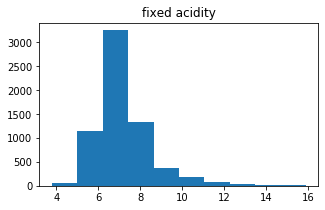

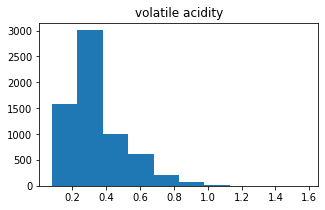

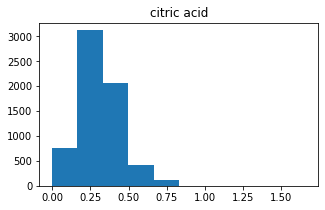

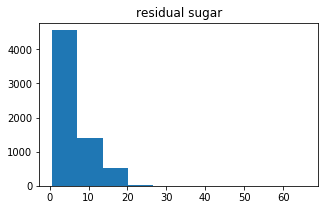

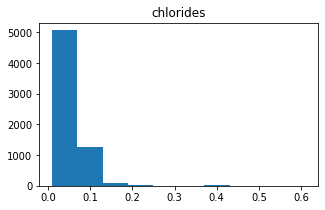

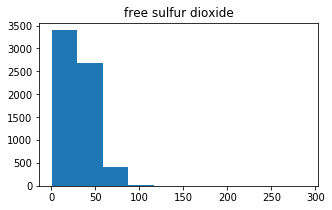

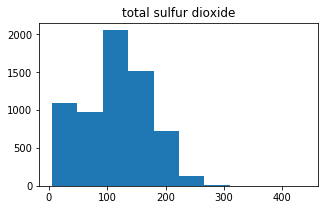

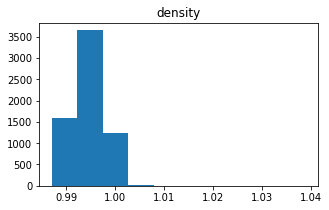

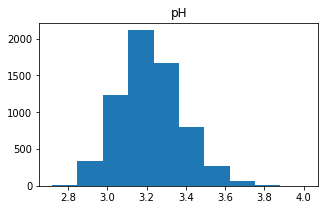

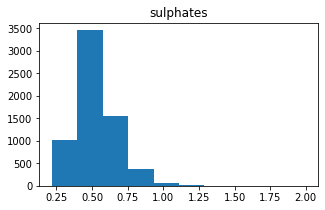

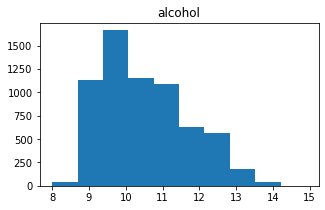

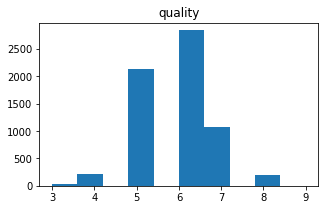

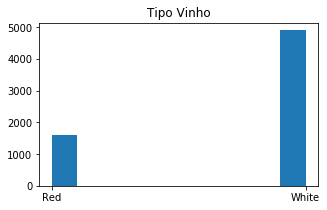

In [193]:
import matplotlib.pyplot as plt

for coluna in dados.columns:
    plt.figure(figsize=[5,3])
    plt.title(coluna)
    plt.hist(dados[coluna])    

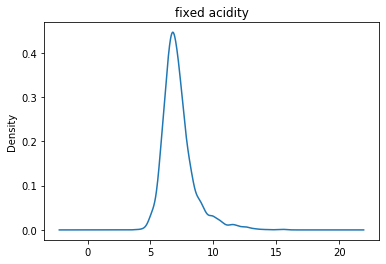

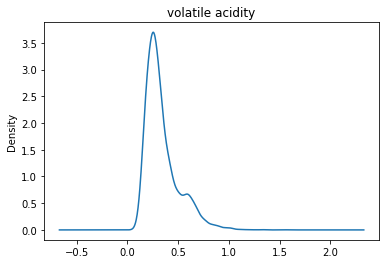

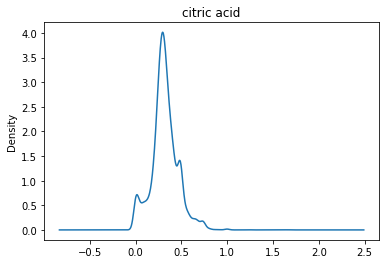

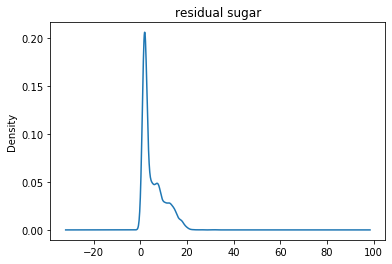

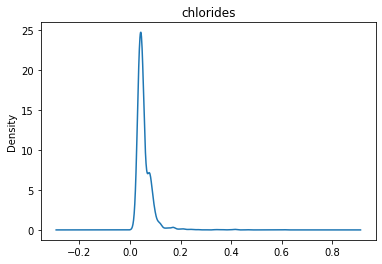

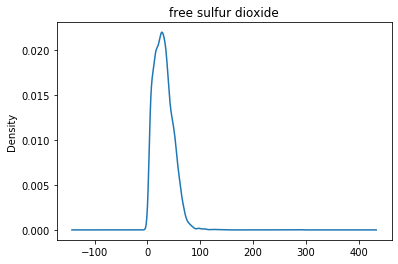

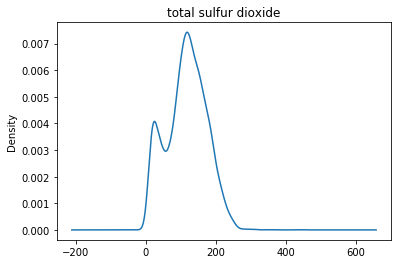

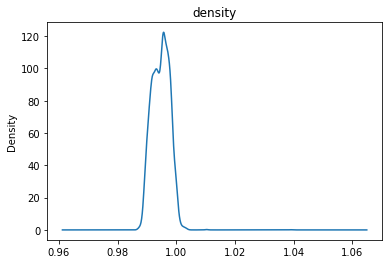

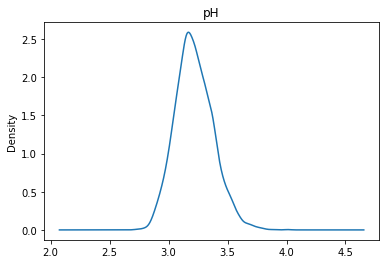

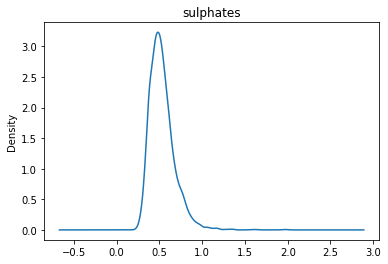

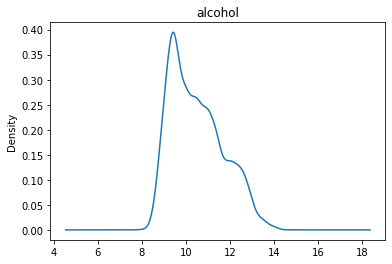

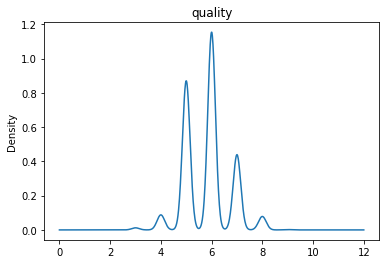

In [194]:
for coluna in dadosNumericos.columns:
    plt.figure()
    plt.title(coluna)
    dadosNumericos[coluna].plot.kde()

## Histogramas e KDE para diferentes grupos.

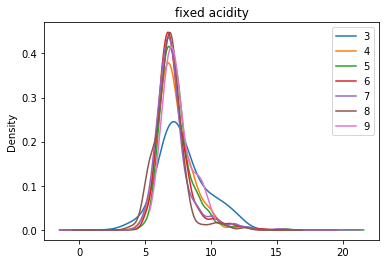

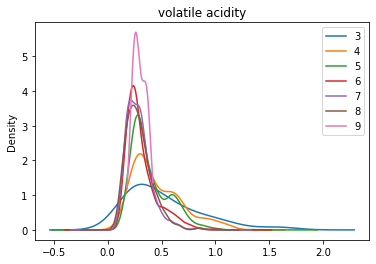

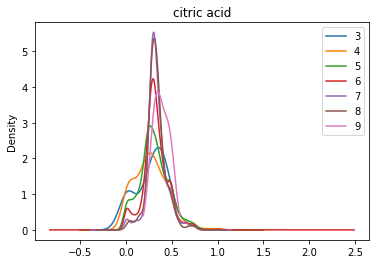

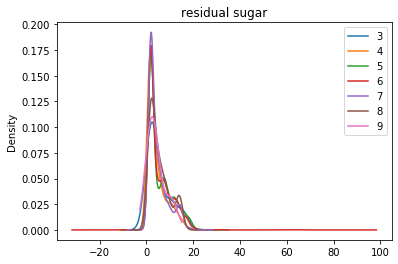

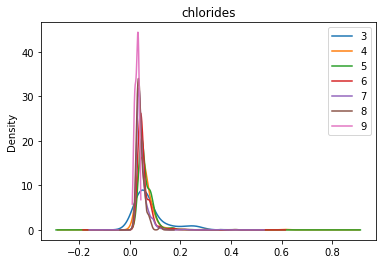

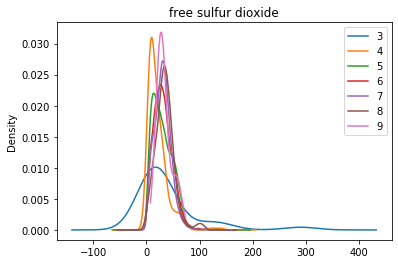

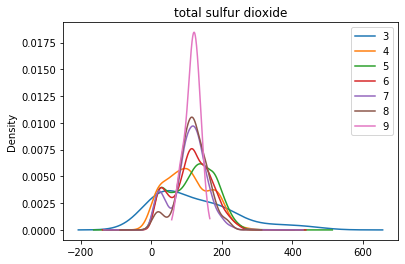

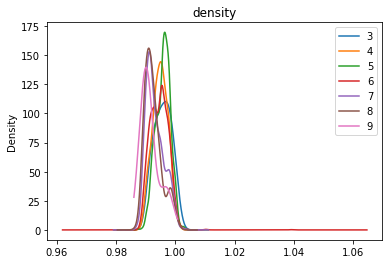

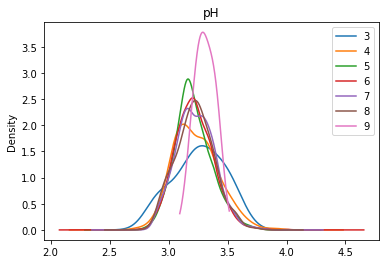

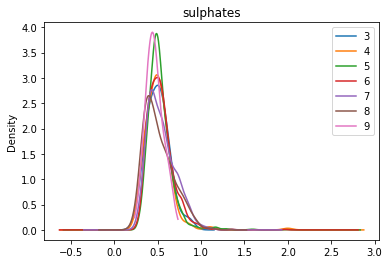

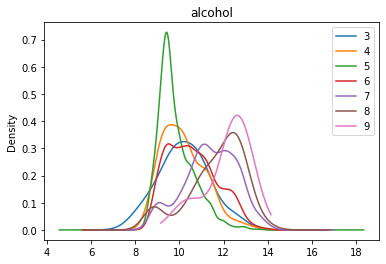

In [195]:
dadosSemQuality = dadosNumericos.copy()
dadosSemQuality.drop(['quality'], axis=1, inplace=True)

for coluna in dadosSemQuality.columns:
    plt.figure()
    plt.title(coluna)
    dadosNumericos.groupby(['quality'])[coluna].plot.kde(legend=True)

## Coeficientes de Correlação

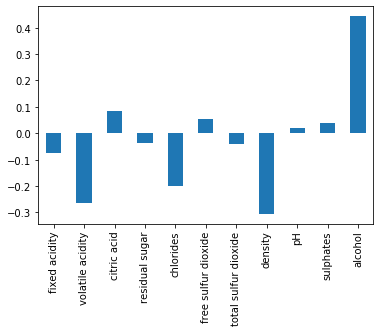

In [196]:
dados.corr()['quality'].drop('quality').plot.bar()

## Boxplot

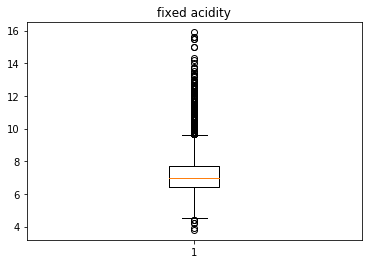

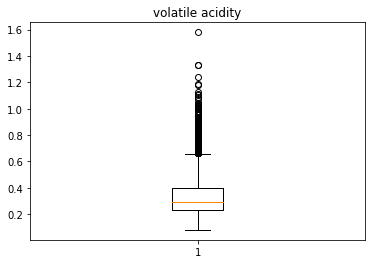

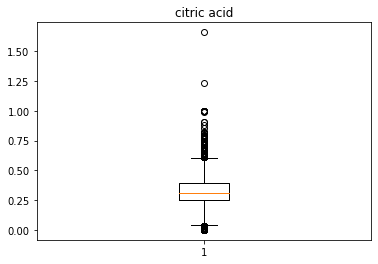

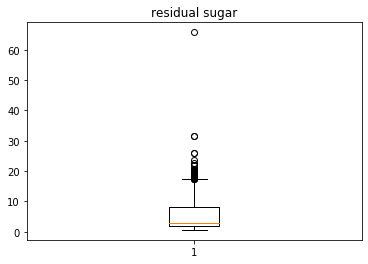

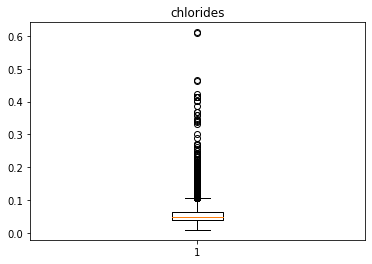

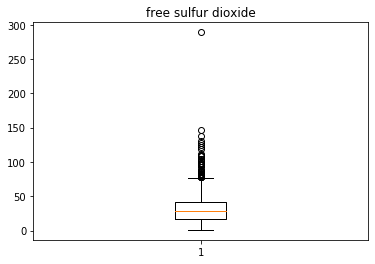

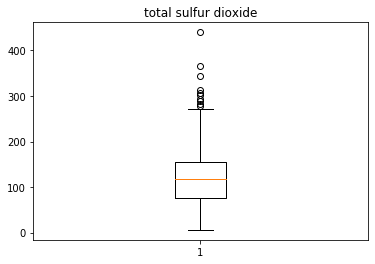

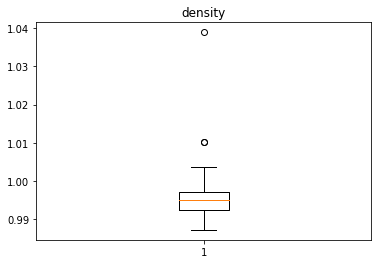

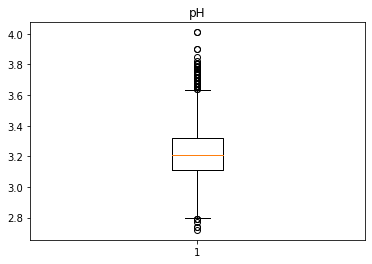

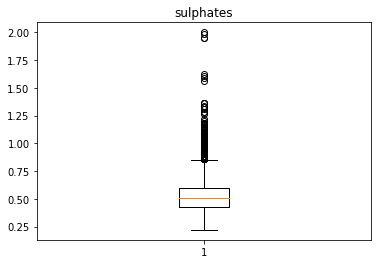

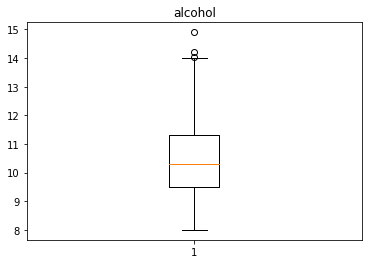

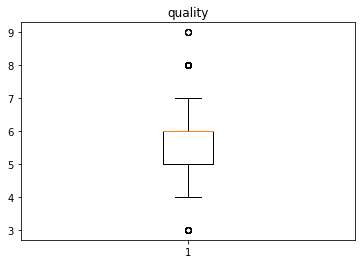

In [207]:
for coluna in dados.drop(['Tipo Vinho'], axis=1).columns:
    plt.figure()
    plt.title(coluna)
    plt.boxplot(dados[coluna])

## Scatter Plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23d7d990>,
      dtype=object)

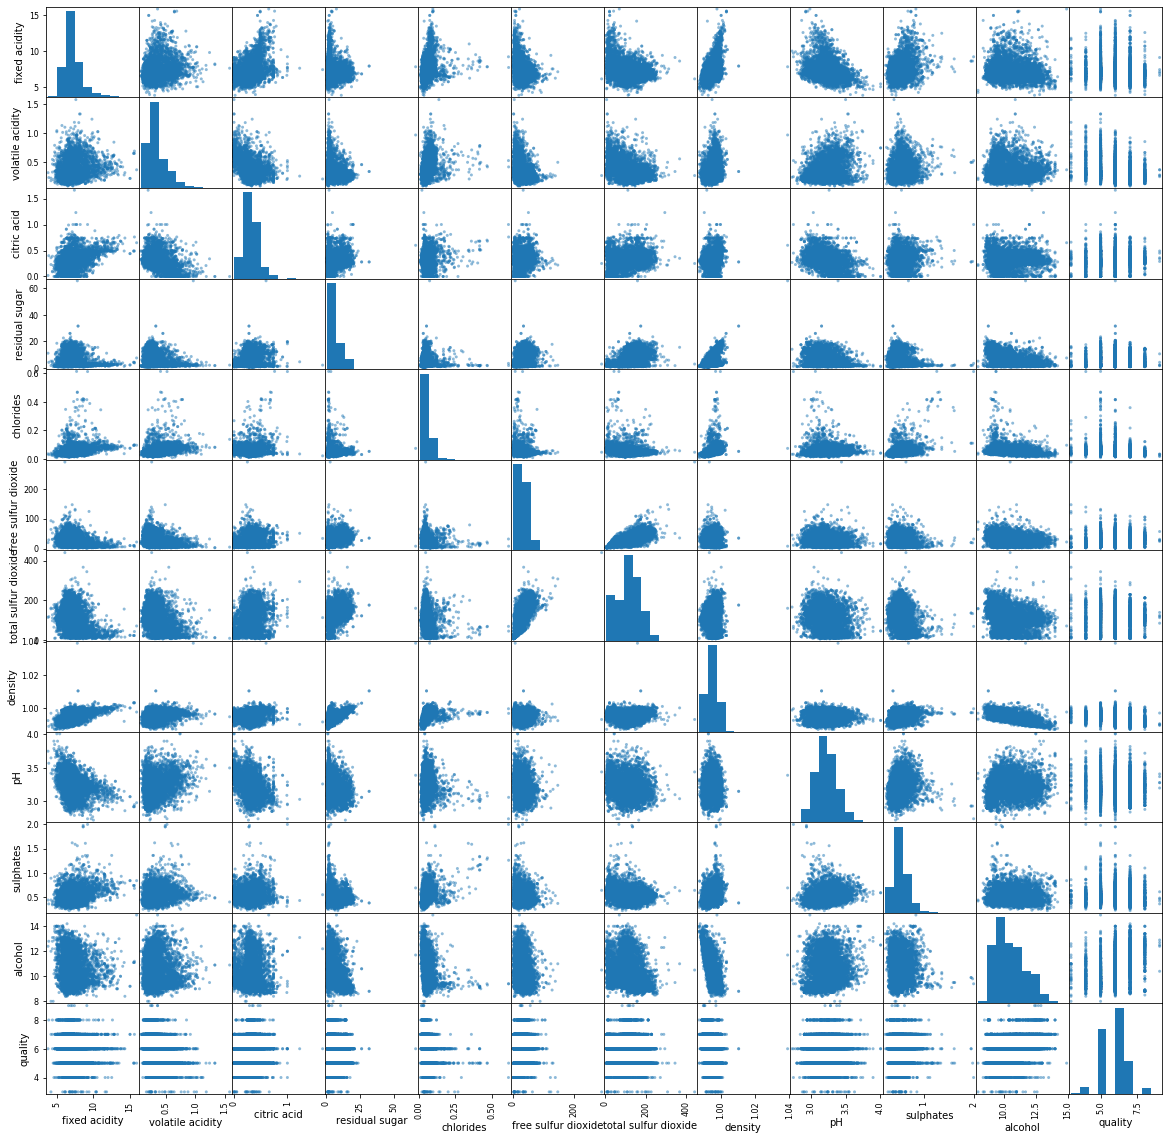

In [214]:
plt.rc('figure', figsize=[20,20])
pd.plotting.scatter_matrix(dados)

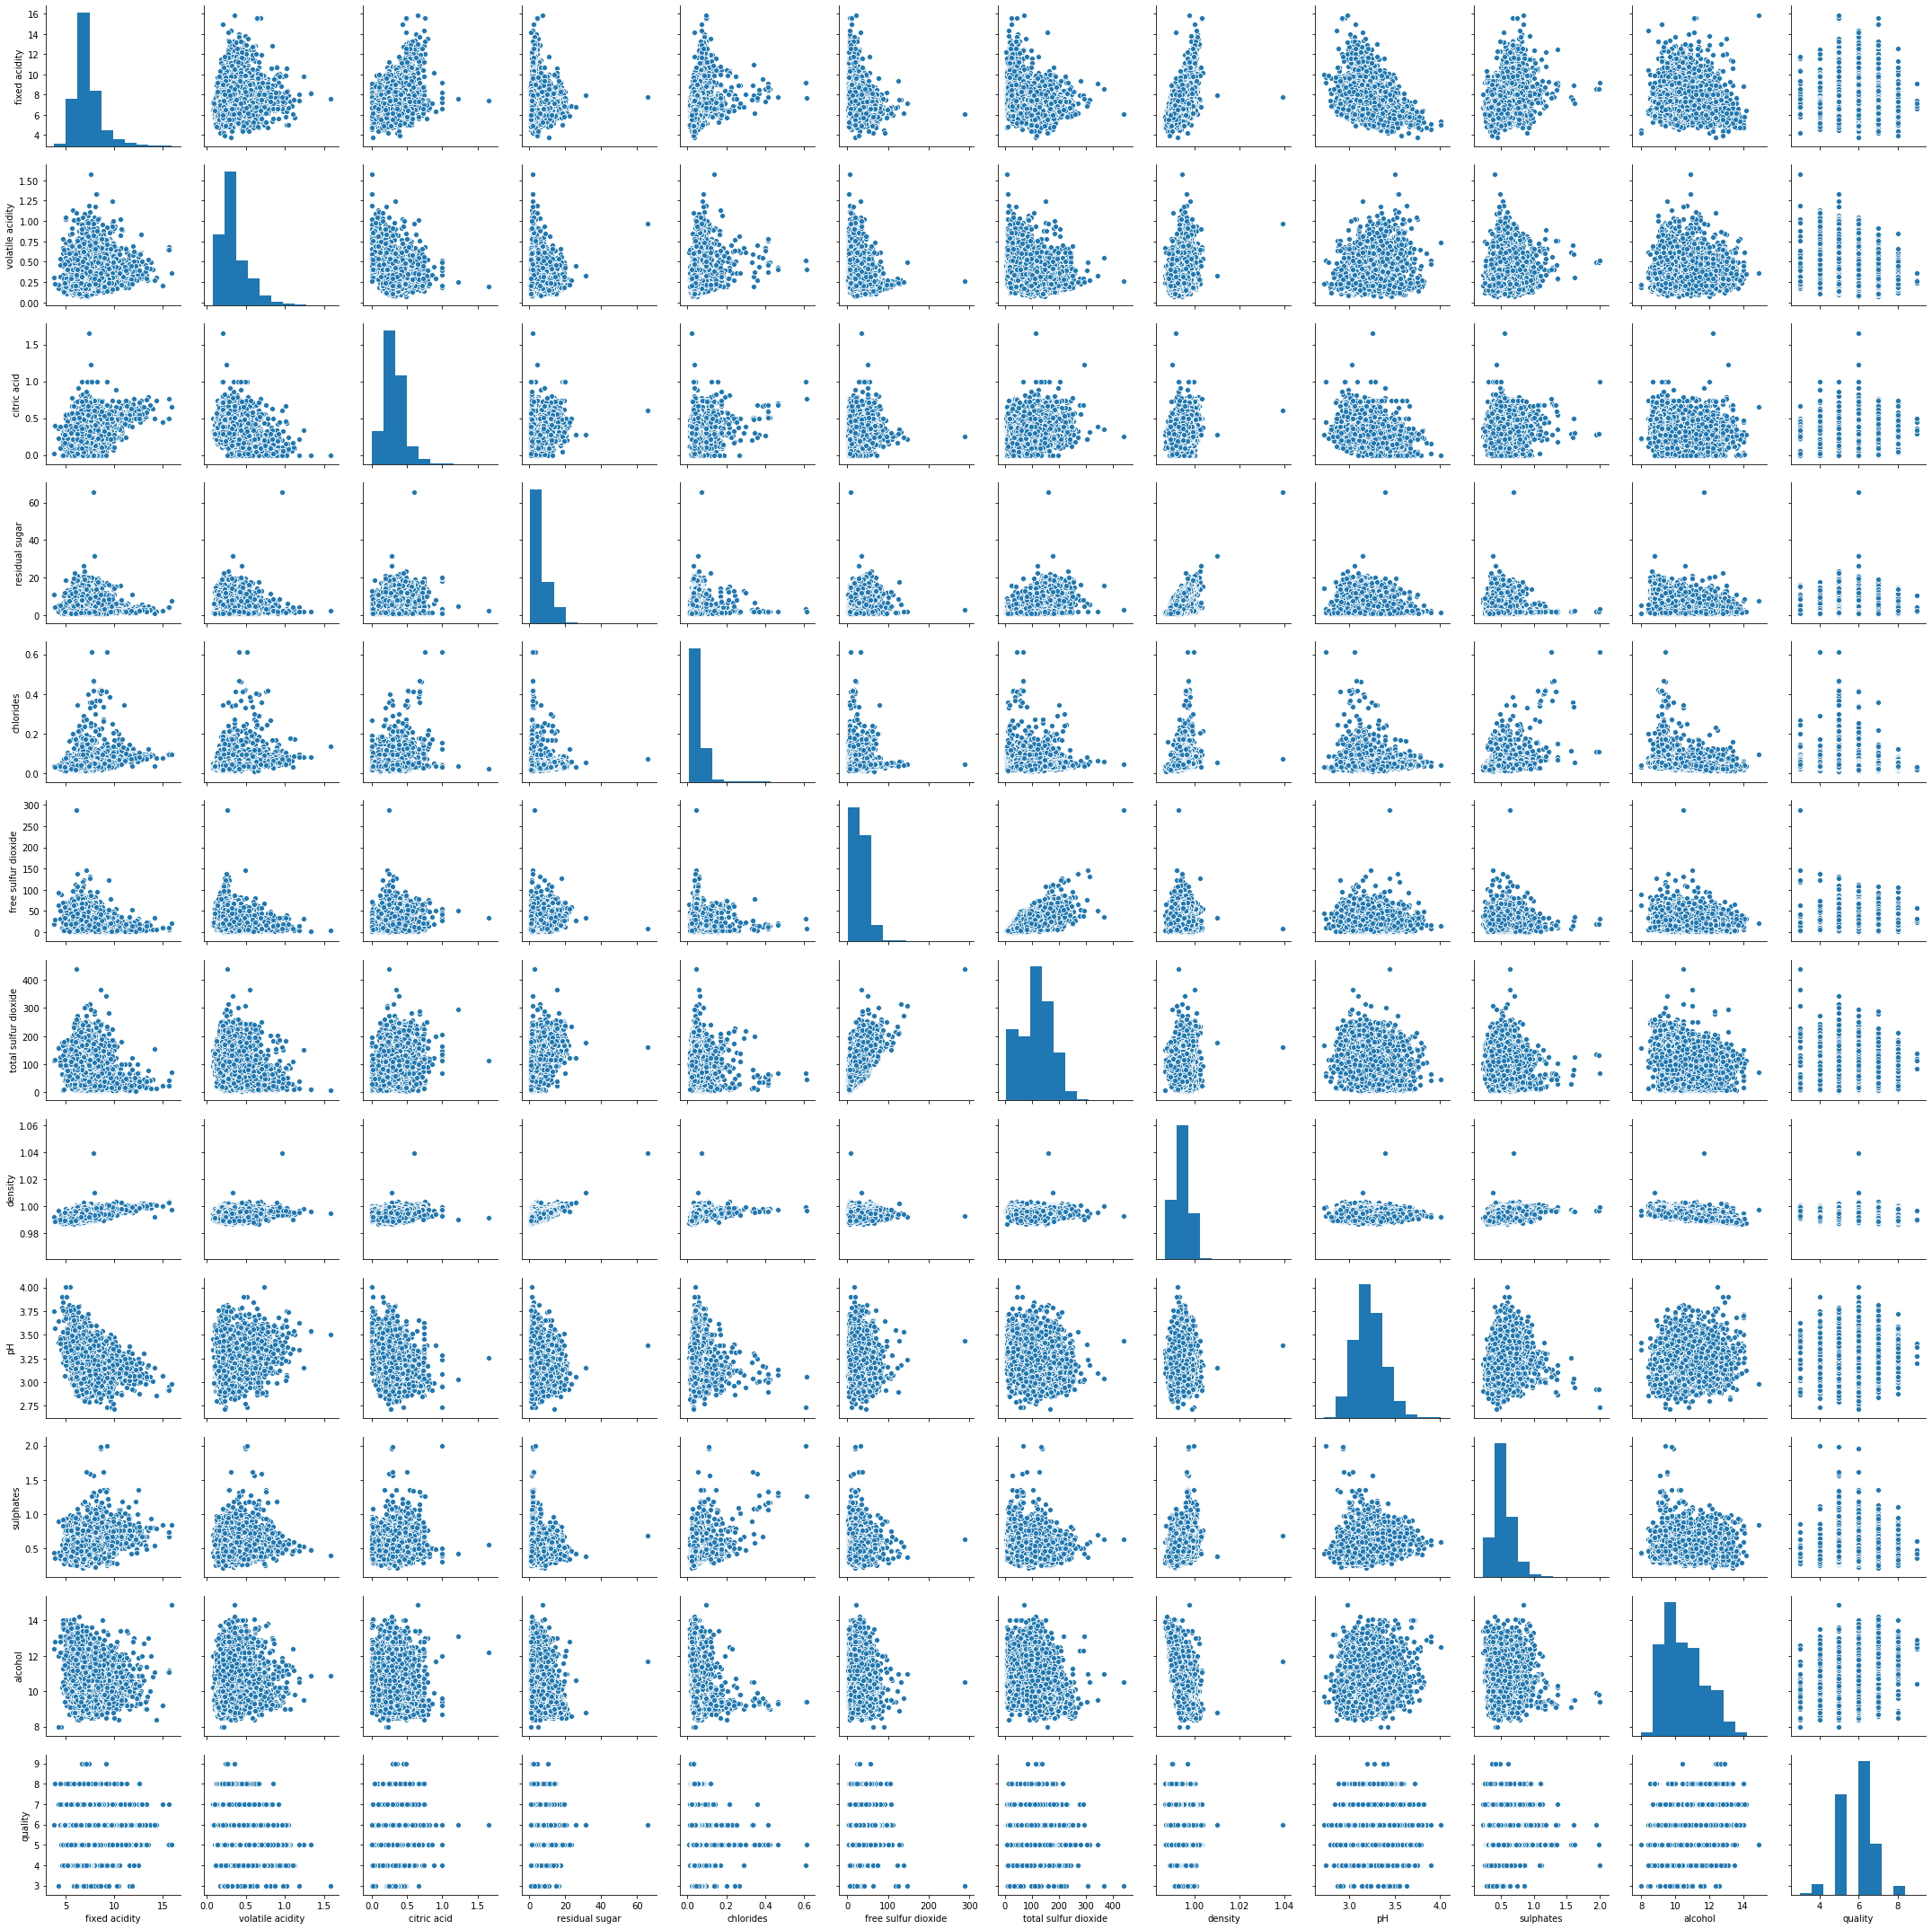

In [210]:
import seaborn as sns
sns.pairplot(dados)